## PASO 1. Comprender nuestro objetivo

Nuestro objetivo con este sistema es crear un modelo de **regresión lineal múltiple** capaz de predecir el coste del seguro médico para una persona dada en base a una serie de atributos.

Para ello, partimos del conjunto de datos almacenado en 'insurance.csv', que contiene ejemplos etiquetados para el entrenamiento del modelo.


En este caso, la etiqueta de nuestro modelo (la variable que tratamos de predecir con el resto de atributos) es el valor en la columna **'charges'** para cada uno de los registros.

## PASO 2. Importar librerías y archivos necesarios

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
registro_medico_df = pd.read_csv('insurance.csv')

## 3. Analizar nuestro conjunto de datos

In [3]:
registro_medico_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
registro_medico_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
registro_medico_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
registro_medico_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 4. Preprocesamiento de datos

En este proceso intervienen una serie de subprocesos que debemos tener en cuenta:

  - Debemos eliminar los valores nulos de nuestro dataframe.
  - Debemos modificar los valores de algunas columnas para que nuestro modelo pueda trabajar con ellos.
  - Debemos regularizar los valores para algunas columnas en donde veamos una gran diferencia entre valores.

In [7]:
# Consulto si hay valores nulos y, de haberlos, los elimino.

registro_medico_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Podemos ver que nuestro dataframe no contiene valores nulos para ninguna columna.

In [9]:
# El siguiente paso sería modificar el tipo de dato para los valores de algunas columnas.
# Si mostramos las primeras filas para nuestro dataframe 'registro_medico_df':

registro_medico_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Podemos hacer los siguientes cambios:
#   - Podemos modificar los valores de las columnas 'sex' y 'smoker', haciendo uso de una codificación one-hot.
#     Teniendo esto claro, voy a asignar un valor de 1 para el valor 'male' en la columna 'sex', y un valor de 0
#     para los valores 'female'. A su vez, asigno un valor de 1 en la columna 'smoker' para aquellas personas que
#     fuman, y un valor de 0 para aquellas que no.
#   - Por otro lado, podria crear tres nuevas columnas (y eliminar la columna 'region'), asignando una codificacion 
#     one-hot para cada uno de los valores registrados en la columna 'region'.

In [11]:
registro_medico_df.loc[registro_medico_df['sex'] == 'male', 'sex'] = 1
registro_medico_df.loc[registro_medico_df['sex'] == 'female', 'sex'] = 0

In [12]:
registro_medico_df.loc[registro_medico_df['smoker'] == 'yes', 'smoker'] = 1
registro_medico_df.loc[registro_medico_df['smoker'] == 'no', 'smoker'] = 0

In [13]:
# Creo nuevas columnas utilizando la función get_dummies
regiones = pd.get_dummies(registro_medico_df['region'])

# Uno estas columnas al final del dataframe original en una copia de este
registro_medico_df = pd.concat([registro_medico_df, regiones], axis=1)

In [14]:
registro_medico_df = registro_medico_df.drop(columns = ['region'])

In [15]:
registro_medico_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [16]:
# Ahora el dataframe contiene valores que el modelo podrá procesar.
# Por último, voy a dividir los valores de la columna 'charges' para tratar de disminuir la distancia entre un valor 
# y otro.

# registro_medico_df['charges'] = registro_medico_df['charges'] / 1000
registro_medico_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [17]:
registro_medico_df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
charges      float64
northeast      uint8
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object

In [18]:
registro_medico_df['northeast'] = registro_medico_df['northeast'].astype(int)
registro_medico_df['northwest'] = registro_medico_df['northwest'].astype(int)
registro_medico_df['southeast'] = registro_medico_df['southeast'].astype(int)
registro_medico_df['southwest'] = registro_medico_df['southwest'].astype(int)

In [19]:
registro_medico_df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
charges      float64
northeast      int64
northwest      int64
southeast      int64
southwest      int64
dtype: object

## 5.Visualización de nuestros datos

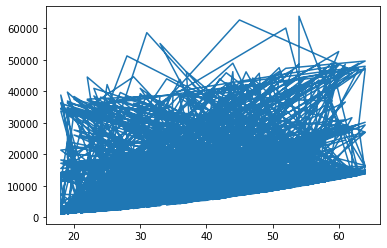

In [20]:
edad = registro_medico_df['age']
coste = registro_medico_df['charges'] # Recordemos que hemos dividimos los valores entre 1000.

plt.plot(edad, coste)

plt.show()

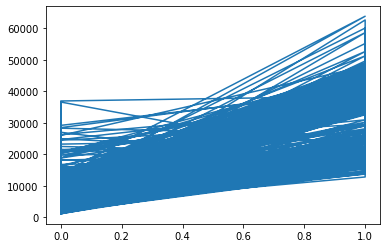

In [21]:
fumador = registro_medico_df['smoker']
coste = registro_medico_df['charges']

plt.plot(fumador, coste)

plt.show()

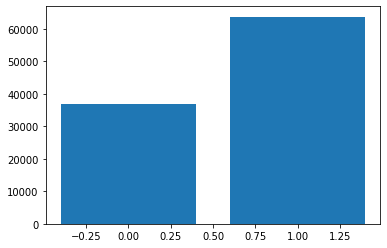

In [22]:
plt.bar(fumador, coste)
plt.show()

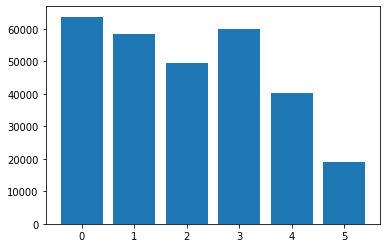

In [23]:
hijos = registro_medico_df['children']

plt.bar(hijos, coste)
plt.show()

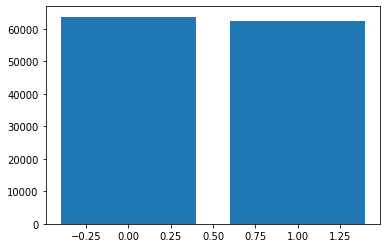

In [24]:
sexo = registro_medico_df['sex']

plt.bar(sexo, coste)
plt.show()

## 6. División del conjunto de datos

In [25]:
# Voy a crear separar los atributos y la etiqueta del conjunto de datos.

X = registro_medico_df.drop(columns = ['charges'])
y = registro_medico_df['charges']

In [26]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [27]:
y = np.reshape(y, (-1,1))

In [28]:
X.shape

(1338, 9)

In [29]:
y.shape

(1338, 1)

In [31]:
X_train.shape

(1003, 9)

In [32]:
X_test.shape

(335, 9)

In [33]:
y_train.shape

(1003, 1)

In [34]:
y_test.shape

(335, 1)

## 7. Definir el modelo y entrenarlo

In [35]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [45]:
# En la siguiente línea utilizo el modelo para tratar de hacer una predicción. Para ello, paso como argumento la
# variable X_test, que contiene los atributos del modelo para un 20% de los registros del conjunto de datos.

predicciones = model.predict(X_test)

# Imprimo los diez primeros registros de la variable X_test
print(X_test[:10])

[[45.     0.    25.175  2.     0.     1.     0.     0.     0.   ]
 [36.     0.    30.02   0.     0.     0.     1.     0.     0.   ]
 [64.     0.    26.885  0.     1.     0.     1.     0.     0.   ]
 [46.     1.    25.745  3.     0.     0.     1.     0.     0.   ]
 [19.     1.    31.92   0.     1.     0.     1.     0.     0.   ]
 [34.     1.    42.9    1.     0.     0.     0.     0.     1.   ]
 [19.     0.    22.515  0.     0.     0.     1.     0.     0.   ]
 [64.     1.    37.905  0.     0.     0.     1.     0.     0.   ]
 [28.     0.    17.29   0.     0.     1.     0.     0.     0.   ]
 [49.     1.    28.69   3.     0.     0.     1.     0.     0.   ]]


In [46]:
# Muestro las predicciones del modelo corespondiente a los 10 primeros registros mostrados antes.
predicciones[:10]

array([[ 8952.207  ],
       [ 7053.7695 ],
       [36888.344  ],
       [ 9522.514  ],
       [26961.828  ],
       [10878.238  ],
       [   89.93359],
       [17048.217  ],
       [ 1006.2168 ],
       [11302.109  ]], dtype=float32)

In [37]:
# Cabe mencionar que el resultado que nos arroja la predicción deberiamos de multiplicarlo por 1000. Tras esto, la
# cifra resultante sería el coste que el modelo ha predicho para un paciente valores para los atributos como los 
# señalados. (HACER ESTO SOLO SI SE EJECUTA LA LINEA registro_medico_df['charges'] = registro_medico_df['charges'] / 1000)


In [40]:
# EJECUTAR PARA ELIMINAR LAS VARIABLES

# del model
# del X
# del y